In [1]:
using LinearAlgebra
using Plots

In [8]:
include("../rollout.jl")
include("../testfns.jl")

ConstantTestFunction (generic function with 2 methods)

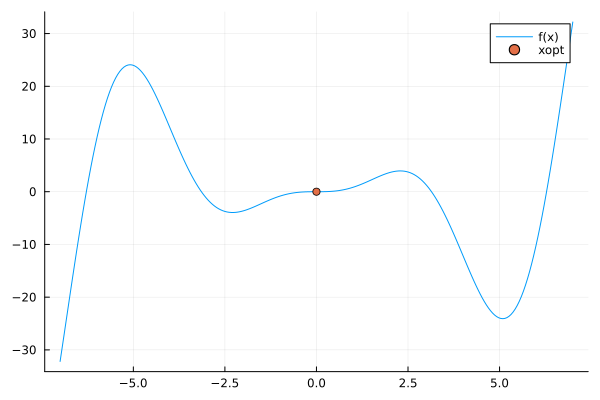

In [4]:
testfn = TestFunction(
    1,
    [-7. 7.],
    [0.],
    x -> (sin(first(x)) * first(x)^2),
    x -> [sin(first(x)) * 2first(x) + cos(first(x))*first(x)^2]
)
tplot(testfn)

In [5]:
n, h, σn2 = 1, 0, 1e-6
MC_SAMPLES = 1
# Setup low discrepancy random number stream
lds_rns = gen_low_discrepancy_sequence(MC_SAMPLES, testfn.dim, h+1);
rns = randn(MC_SAMPLES, testfn.dim+1, h+1);

MAX_BUDGET, MAX_TRIALS = 25, 1
xmin, xmax, d = (testfn.bounds[1], testfn.bounds[2], size(testfn.bounds, 1))
θ = [.17]
ψ = kernel_matern52(θ)

lbs, ubs = [xmin], [xmax]
ϵ, num_starts = 1e-6, 64
s = SobolSeq(lbs, ubs)

xstarts = reduce(hcat, next!(s) for i = 1:num_starts)
xstarts = hcat(xstarts, lbs .+ ϵ)
xstarts = hcat(xstarts, ubs .- ϵ);

In [6]:
X = [-5.5;; -4.;; .5;; 3.5;; 1.5;;]
y = [testfn.f(X[:,j]) for j in 1:size(X, 2)]
sur = fit_surrogate(ψ, X, y; σn2=σn2);

In [10]:
opt_sur = optimize_hypers_optim(sur, kernel_matern52)

RBFsurrogate(RBFfun([1.1466286645625863], var"#ψ#1158"{var"#k#1168", Vector{Float64}}(var"#k#1168"(), [1.1466286645625863]), var"#Dρ_ψ#1159"{var"#ψ#1158"{var"#k#1168", Vector{Float64}}}(var"#ψ#1158"{var"#k#1168", Vector{Float64}}(var"#k#1168"(), [1.1466286645625863])), var"#Dρρ_ψ#1160"{var"#Dρ_ψ#1159"{var"#ψ#1158"{var"#k#1168", Vector{Float64}}}}(var"#Dρ_ψ#1159"{var"#ψ#1158"{var"#k#1168", Vector{Float64}}}(var"#ψ#1158"{var"#k#1168", Vector{Float64}}(var"#k#1168"(), [1.1466286645625863]))), var"#∇θ_ψ#1161"{var"#k#1168", Vector{Float64}}(var"#k#1168"(), [1.1466286645625863])), [-5.5 -4.0 … 3.5 1.5], [1.000001 0.36364073893667553 … 2.8924347921594985e-6 9.05052990967896e-5; 0.36364073893667553 1.000001 … 3.8656149651759975e-5 0.0011002575713915624; … ; 2.8924347921594985e-6 3.8656149651759975e-5 … 1.000001 0.2017799044583593; 9.05052990967896e-5 0.0011002575713915624 … 0.2017799044583593 1.000001], [1.000000499999875 0.0 … 0.0 0.0; 0.36364055711644244 0.9315398784915454 … 0.0 0.0; … ; 2.8

In [11]:
opt_sur.K

5×5 Matrix{Float64}:
 1.0          0.363641    0.000483473  2.89243e-6  9.05053e-5
 0.363641     1.0         0.00547504   3.86561e-5  0.00110026
 0.000483473  0.00547504  1.0          0.0525655   0.600007
 2.89243e-6   3.86561e-5  0.0525655    1.0         0.20178
 9.05053e-5   0.00110026  0.600007     0.20178     1.0

In [12]:
sur.K

5×5 Matrix{Float64}:
 1.0          4.06318e-7   1.14582e-31  1.85603e-48  3.00785e-37
 4.06318e-7   1.0          2.41711e-23  4.79775e-40  6.93797e-29
 1.14582e-31  2.41711e-23  1.0          4.07871e-15  0.000139265
 1.85603e-48  4.79775e-40  4.07871e-15  1.0          9.69954e-10
 3.00785e-37  6.93797e-29  0.000139265  9.69954e-10  1.0

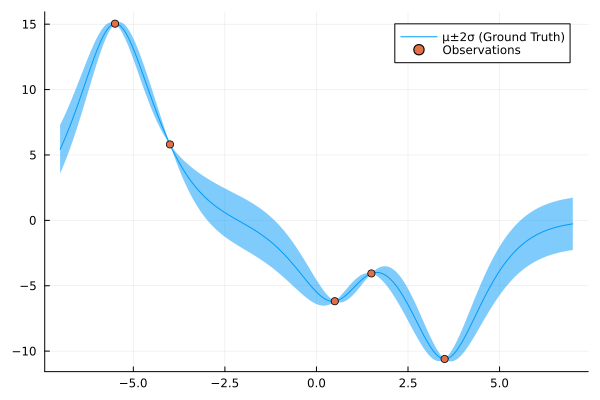

In [14]:
plot1D(opt_sur; xmin=xmin, xmax=xmax, npts=1000)